In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stat

# housing_data = pd.read_csv("../datasets/LOW_MOD_INCOME_BY_BG_195132293809767522.csv")
iaq_data = pd.read_csv("../datasets/PrePost_merged.csv")

In [5]:
# print(housing_data.head())

# print(housing_data.describe())

In [6]:
# print(iaq_data.describe())
pre_data = iaq_data["Prer_Griffin_PM10"]
post_data = iaq_data["Post_Griffin_PM10"]
print("Pre Reno Value: " , pre_data.mean())
print("Post Reno Value: " , post_data.mean())

Pre Reno Value:  22.19534970238095
Post Reno Value:  27.88709248170326


In [27]:
t_val, p_val = stat.ttest_ind( pre_data, post_data, nan_policy='omit', alternative='greater')

print(t_val)
print(p_val)


-11.170714880981738
1.0


In [31]:
print("Pre Reno Data: ", pre_data.describe())
print("Post Reno Data: ", post_data.describe())

Pre Reno Data:  count    336.000000
mean      22.195350
std       15.402768
min        2.411944
25%       12.044375
50%       19.039861
75%       27.605278
max       99.604444
Name: Prer_Griffin_PM10, dtype: float64
Post Reno Data:  count    334.000000
mean      27.887092
std       14.654943
min        5.055556
25%       17.899306
50%       24.123810
75%       35.910714
max      103.869048
Name: Post_Griffin_PM10, dtype: float64


In [7]:
import requests
import json
# Function to get live stock data for a symbol

url = 'https://aqs.epa.gov/data/api/monitors/byCBSA?email=zdelk@southface.org&key=carmelmouse36&param=42602&bdate=20170101&edate=20170101&cbsa=16740'
url2 = 'https://aqs.epa.gov/data/api/sampleData/byState?email=zdelk@southface.org&key=carmelmouse36&param=88101&bdate=20000101&edate=20000121&state=13'

url3 = 'https://aqs.epa.gov/data/api/sampleData/byState?email=zdelk@southface.org&key=carmelmouse36&param=88101&bdate=20200101&edate=20201201&state=13'

response = requests.get(url)

response2 = requests.get(url2)
response3 = requests.get(url3)

print(response)
print(response2)
print(response3)


<Response [200]>
<Response [200]>
<Response [200]>


In [8]:
response = requests.get("http://api.open-notify.org/astros")
print(response.status_code)
print(response.json())

200
{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [9]:
import json

def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)
    
jprint(response2.json())

{
    "Data": [
        {
            "cbsa_code": "12060",
            "county": "DeKalb",
            "county_code": "089",
            "date_gmt": "2000-01-01",
            "date_local": "2000-01-01",
            "date_of_last_change": null,
            "datum": "NAD83",
            "detection_limit": 2.0,
            "latitude": 33.6878,
            "longitude": -84.2905,
            "method": "Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIMETRIC",
            "method_code": "120",
            "method_type": "FRM",
            "parameter": "PM2.5 - Local Conditions",
            "parameter_code": "88101",
            "poc": 1,
            "qualifier": null,
            "sample_duration": "24 HOUR",
            "sample_duration_code": "7",
            "sample_frequency": "EVERY DAY",
            "sample_measurement": 22.0,
            "site_number": "0002",
            "state": "Georgia",
            "state_code": "13",
            "time_gmt": "05:00",
            "time_local": "00:0

In [10]:
from pandas import json_normalize

data1 = response2.json()
print(data1)


{'Header': [{'status': 'Success', 'request_time': '2024-09-25T13:48:05-04:00', 'url': 'https://aqs.epa.gov/data/api/sampleData/byState?email=zdelk@southface.org&key=carmelmouse36&param=88101&bdate=20000101&edate=20000121&state=13', 'rows': 213}], 'Data': [{'state_code': '13', 'county_code': '089', 'site_number': '0002', 'parameter_code': '88101', 'poc': 1, 'latitude': 33.6878, 'longitude': -84.2905, 'datum': 'NAD83', 'parameter': 'PM2.5 - Local Conditions', 'date_local': '2000-01-01', 'time_local': '00:00', 'date_gmt': '2000-01-01', 'time_gmt': '05:00', 'sample_measurement': 22.0, 'units_of_measure': 'Micrograms/cubic meter (LC)', 'units_of_measure_code': '105', 'sample_duration': '24 HOUR', 'sample_duration_code': '7', 'sample_frequency': 'EVERY DAY', 'detection_limit': 2.0, 'uncertainty': None, 'qualifier': None, 'method_type': 'FRM', 'method': 'Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIMETRIC', 'method_code': '120', 'state': 'Georgia', 'county': 'DeKalb', 'date_of_last_change': N

In [11]:
test1 = json_normalize(data1['Data'])

print(test1.describe())

         poc    latitude   longitude  sample_measurement  detection_limit
count  213.0  213.000000  213.000000           200.00000            213.0
mean     1.0   33.306195  -83.811666            13.70850              2.0
std      0.0    0.889308    1.136893             6.12364              0.0
min      1.0   30.848600  -85.304826             1.60000              2.0
25%      1.0   32.805264  -84.435618             9.40000              2.0
50%      1.0   33.687800  -84.279903            13.40000              2.0
75%      1.0   33.901389  -83.372102            16.10000              2.0
max      1.0   34.978800  -81.143990            43.10000              2.0


['DeKalb', 'Fulton', 'Glynn', 'Gwinnett', 'Lowndes', 'Muscogee', 'Walker', 'Washington', 'Wilkinson', 'Bibb', 'Clayton', 'Chatham', 'Clarke', 'Richmond', 'Dougherty', 'Floyd', 'Paulding', 'Cobb', 'Hall']
county
Bibb          15
Chatham       14
Clarke         7
Clayton        7
Cobb           7
DeKalb        42
Dougherty      7
Floyd          7
Fulton        35
Glynn          7
Gwinnett       4
Hall           7
Lowndes        4
Muscogee      14
Paulding       7
Richmond      14
Walker         4
Washington     4
Wilkinson      7
dtype: int64


<BarContainer object of 19 artists>

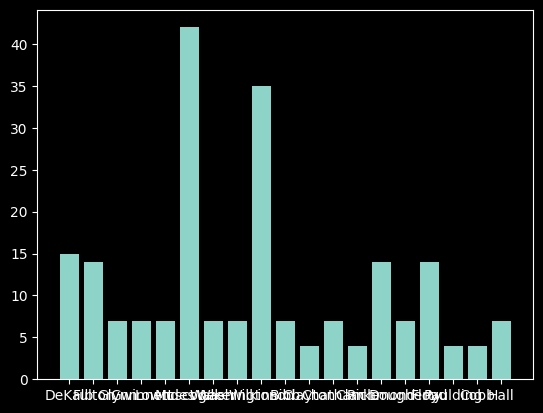

In [12]:
import matplotlib.pyplot as plt

counts = test1.groupby(['county']).size()
names = list(test1['county'].unique())
print(names)
print(counts)

plt.bar(names, counts)

In [74]:
grouped = test1['sample_measurement'].groupby(test1['county'])
print(grouped.mean())
grouped_df = grouped.mean()

county
Bibb          12.300000
Chatham       15.175000
Clarke        13.100000
Clayton       13.457143
Cobb          13.742857
DeKalb        13.409524
Dougherty     14.285714
Floyd         12.871429
Fulton        14.815625
Glynn         13.450000
Gwinnett      12.200000
Hall          12.800000
Lowndes       14.500000
Muscogee      10.950000
Paulding       9.357143
Richmond      17.525000
Walker        21.550000
Washington    13.050000
Wilkinson     11.800000
Name: sample_measurement, dtype: float64


In [ ]:

url3 = 'https://aqs.epa.gov/data/api/sampleData/byState?email=zdelk@southface.org&key=carmelmouse36&param=88101&bdate=20200101&edate=20201201&state=13'

data3 = response3.json()
df_2020 = json_normalize(data3['Data'])

print(df_2020.describe())

In [91]:
import matplotlib.pyplot as plt

group_count = df_2020.groupby(['county','date_local'])['sample_measurement'].mean()
print(group_count.head())
# # print(group_count.mean())
# x = df_2020['date_local'].groupby(df_2020['county'])
# y = df_2020['sample_measurement'].groupby(df_2020['county'])

# plt.plot(x,y)

county  date_local
Bibb    2020-01-01    3.240000
        2020-01-02    4.950000
        2020-01-03    4.242857
        2020-01-04    2.462745
        2020-01-05    2.845833
Name: sample_measurement, dtype: float64


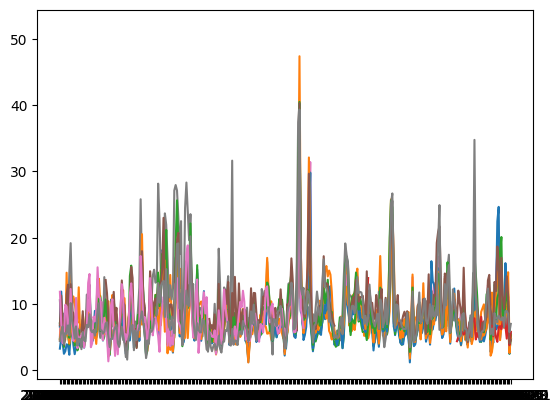

In [98]:
df_new = group_count.unstack(level='county')
# print(df_new.head())


plt.plot(df_new)

In [3]:
import requests

url = "http://airgradient_744dbdc1fa4c.local/measures/current"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


{'wifi': -70, 'serialno': '744dbdc1fa4c', 'rco2': 475, 'pm01': 0, 'pm02': 0, 'pm10': 1, 'pm003Count': 140, 'atmp': 25.32, 'atmpCompensated': 25.32, 'rhum': 46, 'rhumCompensated': 46, 'pm02Compensated': 1, 'tvocIndex': 60, 'tvocRaw': 31852, 'noxIndex': 1, 'noxRaw': 16368, 'boot': 67, 'bootCount': 67, 'ledMode': 'co2', 'firmware': '3.1.9', 'model': 'I-9PSL'}
